In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
import pandas as pd

In [2]:
keras.utils.set_random_seed(21)

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
len(X_train), len(X_test)

(50000, 10000)

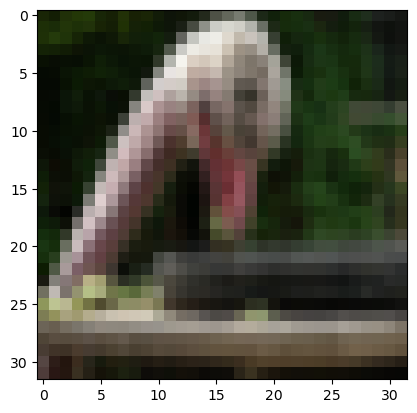

In [5]:
plt.imshow(X_train[400])

In [6]:
X_valid, X_test, y_valid, y_test = tts(X_test, y_test, test_size=0.2, random_state=21)

In [7]:
len(X_test), len(X_valid)

(2000, 8000)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_train = X_train/255
X_test = X_test/255
X_valid = X_valid/255

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)

In [11]:
X_dataset_train = tf.data.Dataset.from_tensor_slices(X_train)
y_dataset_train = tf.data.Dataset.from_tensor_slices(y_train)

dataset_train = tf.data.Dataset.zip((X_dataset_train, y_dataset_train))

In [12]:
X_dataset_valid = tf.data.Dataset.from_tensor_slices(X_valid)
y_dataset_valid = tf.data.Dataset.from_tensor_slices(y_valid)

dataset_valid = tf.data.Dataset.zip((X_dataset_valid, y_dataset_valid))

In [13]:
dataset_train = dataset_train.shuffle(500).batch(256).prefetch(tf.data.experimental.AUTOTUNE)
dataset_valid = dataset_valid.shuffle(500).batch(256).prefetch(tf.data.experimental.AUTOTUNE)

In [14]:
X_dataset_test = tf.data.Dataset.from_tensor_slices(X_test)
y_dataset_test = tf.data.Dataset.from_tensor_slices(y_test)

dataset_test = tf.data.Dataset.zip((X_dataset_test, y_dataset_test))
dataset_test = dataset_test.shuffle(500).batch(256).prefetch(tf.data.experimental.AUTOTUNE)

In [15]:
# Exp 1

#%%
inputs = keras.Input(shape = (32,32,3))
x=keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x=keras.layers.MaxPooling2D((2, 2), strides=2)(x)
x=keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x=keras.layers.MaxPooling2D((2, 2), strides=2)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Conv2D(128, (2, 2), padding='same', activation='relu')(x)
x=keras.layers.MaxPooling2D((2, 2), strides=1)(x)
x=keras.layers.Flatten()(x)
x=keras.layers.Dense(1024, activation="relu", name='Dense_1')(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(2046, activation='relu', name='Dense_2')(x)
x=keras.layers.Dense(512, activation='relu', name='Dense_3')(x)
x=keras.layers.Dense(256, activation='relu', name='Dense_4')(x)
output=keras.layers.Dense(10, activation='softmax', name='Output')(x)

model = keras.models.Model(inputs = inputs, outputs = output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 1024)           │     6,423,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 2046)           │     2,097,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 512)            │     1,048,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,754,952 (37.21 MB)

 Trainable params: 9,754,952 (37.21 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)
    
    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))
    
    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss="categorical_crossentropy",
              metrics=[F1Score(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [18]:
history = model.fit(dataset_train, validation_data=dataset_valid, 
                    epochs=20, callbacks=tf.keras.callbacks.TensorBoard(log_dir='Exp1_logs'))

eval_hist = model.evaluate(dataset_test)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 179ms/step - f1_score: 0.0676 - loss: 1.9865 - precision_1: 0.4462 - recall_1: 0.0377 - val_f1_score: 0.2682 - val_loss: 1.5187 - val_precision_1: 0.7086 - val_recall_1: 0.1654
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 45s 230ms/step - f1_score: 0.3968 - loss: 1.3885 - precision_1: 0.6807 - recall_1: 0.2804 - val_f1_score: 0.4738 - val_loss: 1.2350 - val_precision_1: 0.7727 - val_recall_1: 0.3416
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 46s 236ms/step - f1_score: 0.5056 - loss: 1.2108 - precision_1: 0.7206 - recall_1: 0.3895 - val_f1_score: 0.5585 - val_loss: 1.0978 - val_precision_1: 0.7604 - val_recall_1: 0.4412
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 205ms/step - f1_score: 0.5716 - loss: 1.0952 - precision_1: 0.7485 - recall_1: 0.4623 - val_f1_score: 0.6181 - val_loss: 0.9789 - val_precision_1: 0.7903 - val_recall_1: 0.5075
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 206ms/step - f1_score: 0.6244 - loss: 0.9842 - precision_1: 0.7705 - rec

In [19]:
print("Eval_loss = {} \nEval_f1 = {} \nEval_precision = {} \nEval_recall = {}".format(eval_hist[0], 
                                                                                      eval_hist[1], 
                                                                                      eval_hist[2],
                                                                                      eval_hist[3]))

Eval_loss = 0.6965370178222656 
Eval_f1 = 0.7822705507278442 
Eval_precision = 0.8121635913848877 
Eval_recall = 0.7544999718666077


<Axes: >

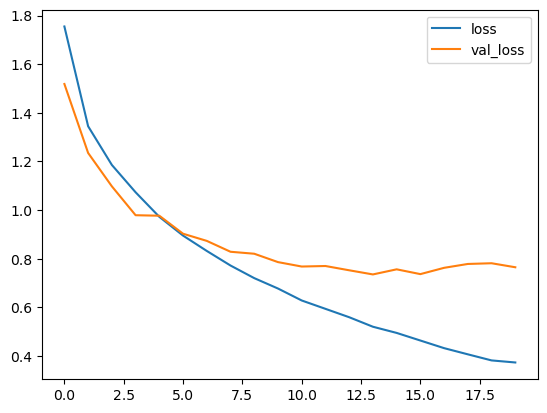

In [20]:
#График изменения функции потерь
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [21]:
print(history_df.columns)

Index(['f1_score', 'loss', 'precision_1', 'recall_1', 'val_f1_score',
       'val_loss', 'val_precision_1', 'val_recall_1'],
      dtype='object')


<Axes: >

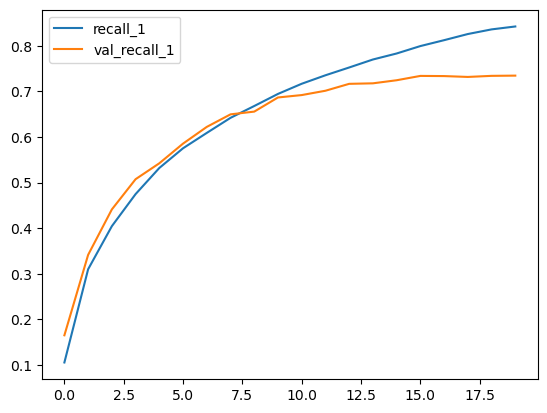

In [22]:
history_df.loc[:, ['recall_1', 'val_recall_1']].plot()

<Axes: >

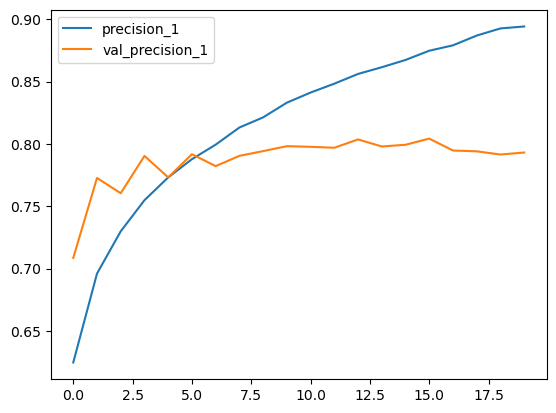

In [23]:
history_df.loc[:, ['precision_1', 'val_precision_1']].plot()

<Axes: >

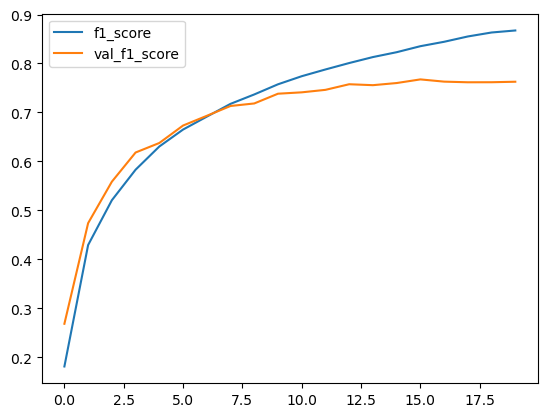

In [24]:
history_df.loc[:, ['f1_score', 'val_f1_score']].plot()

In [25]:
preds = model.predict(X_valid)

250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [26]:
preds = np.argmax(preds, axis=1)
y_valid_idx = np.argmax(y_valid, axis=1)

In [27]:
print(classification_report(y_valid_idx, preds))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       792
           1       0.80      0.93      0.86       811
           2       0.67      0.66      0.67       801
           3       0.53      0.58      0.56       792
           4       0.71      0.73      0.72       804
           5       0.65      0.65      0.65       798
           6       0.84      0.81      0.83       786
           7       0.83      0.78      0.81       801
           8       0.89      0.84      0.86       806
           9       0.88      0.79      0.83       809

    accuracy                           0.76      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.76      0.76      0.76      8000



Text(0.5, 1.0, 'Predicted class:1  Real class:1')

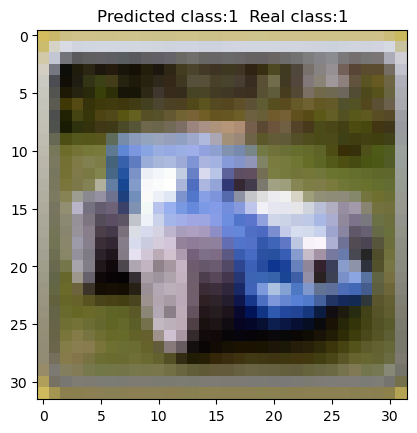

In [28]:
i = 1
plt.imshow(X_valid[i])
plt.title('Predicted class:'+str(preds[i])+'  Real class:'+str(y_valid_idx[i]))

In [29]:
import os

In [30]:
model_dir = 'Models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'exp_1.keras')
model.save(model_path)

In [31]:
# Exp 2 Добавим коллбеки

In [32]:
inputs = keras.Input(shape = (32,32,3))
x=keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x=keras.layers.MaxPooling2D((2, 2), strides=2)(x)
x=keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x=keras.layers.MaxPooling2D((2, 2), strides=2)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Conv2D(128, (2, 2), padding='same', activation='relu')(x)
x=keras.layers.MaxPooling2D((2, 2), strides=1)(x)
x=keras.layers.Flatten()(x)
x=keras.layers.Dense(1024, activation="relu", name='Dense_1')(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(2046, activation='relu', name='Dense_2')(x)
x=keras.layers.Dense(512, activation='relu', name='Dense_3')(x)
x=keras.layers.Dense(256, activation='relu', name='Dense_4')(x)
output=keras.layers.Dense(10, activation='softmax', name='Output')(x)

model_2 = keras.models.Model(inputs = inputs, outputs = output)
model_2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 1024)           │     6,423,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 2046)           │     2,097,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 512)            │     1,048,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,754,952 (37.21 MB)

 Trainable params: 9,754,952 (37.21 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                loss="categorical_crossentropy",
                metrics=[F1Score(), 
                         tf.keras.metrics.Precision(), 
                         tf.keras.metrics.Recall()])

In [34]:
learn_rate_red=keras.callbacks.ReduceLROnPlateau("val_loss", patience=3, factor = 0.5, min_lr=1e-6)
early_stop = keras.callbacks.EarlyStopping("val_loss", patience=6)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="Exp2_logs")

In [35]:
history_2 = model_2.fit(dataset_train, validation_data=dataset_valid, 
                    epochs=40, callbacks=[learn_rate_red, early_stop, tensorboard])

Epoch 1/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 197ms/step - f1_score: 0.0723 - loss: 1.9741 - precision_3: 0.4844 - recall_3: 0.0405 - val_f1_score: 0.3174 - val_loss: 1.4556 - val_precision_3: 0.6758 - val_recall_3: 0.2074 - learning_rate: 5.0000e-04
Epoch 2/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 196ms/step - f1_score: 0.3952 - loss: 1.3804 - precision_3: 0.6819 - recall_3: 0.2785 - val_f1_score: 0.4587 - val_loss: 1.2206 - val_precision_3: 0.7514 - val_recall_3: 0.3301 - learning_rate: 5.0000e-04
Epoch 3/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 206ms/step - f1_score: 0.5042 - loss: 1.2151 - precision_3: 0.7252 - recall_3: 0.3866 - val_f1_score: 0.5734 - val_loss: 1.0617 - val_precision_3: 0.7597 - val_recall_3: 0.4605 - learning_rate: 5.0000e-04
Epoch 4/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 184ms/step - f1_score: 0.5889 - loss: 1.0586 - precision_3: 0.7563 - recall_3: 0.4823 - val_f1_score: 0.6275 - val_loss: 0.9771 - val_precision_3: 0.7692 - val_recall_3: 0.5299 - learning_rate: 5.0000e-04
Epoc

In [36]:
eval_hist_2 = model_2.evaluate(dataset_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - f1_score: 0.7769 - loss: 0.7753 - precision_3: 0.7969 - recall_3: 0.7578


In [37]:
print("Eval_loss = {} \nEval_f1 = {} \nEval_precision = {} \nEval_recall = {}".format(eval_hist_2[0], 
                                                                                      eval_hist_2[1], 
                                                                                      eval_hist_2[2],
                                                                                      eval_hist_2[3]))

Eval_loss = 0.7561430931091309 
Eval_f1 = 0.7830551862716675 
Eval_precision = 0.8047493696212769 
Eval_recall = 0.762499988079071


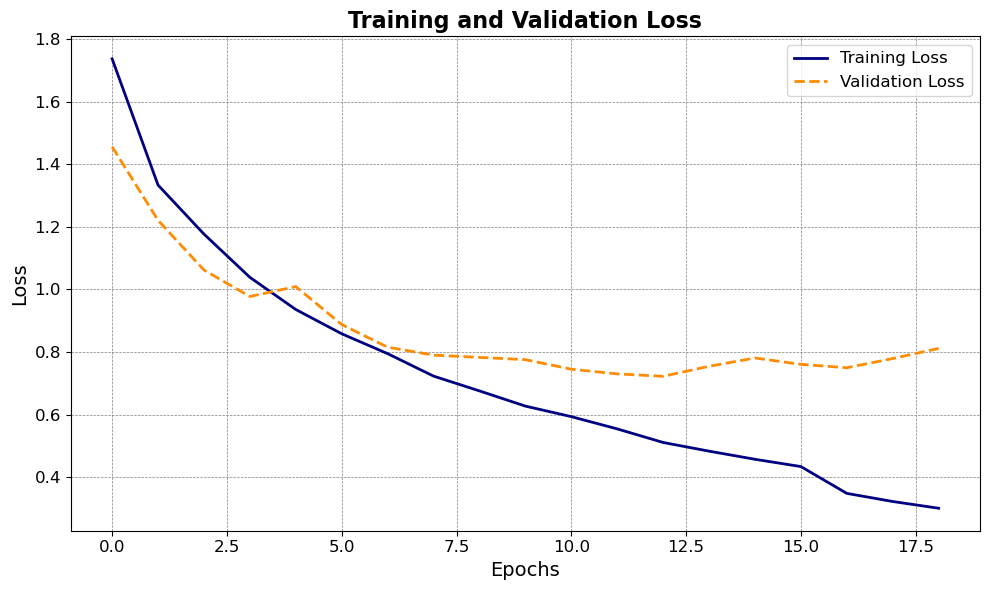

In [38]:
#График изменения функции потерь
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что history_2 - это объект, возвращенный методом fit()
history_df = pd.DataFrame(history_2.history)

plt.figure(figsize=(10, 6))  # Устанавливаем размер фигуры
plt.plot(history_df['loss'], label='Training Loss', color='navy', linewidth=2)  # Указываем цвет и толщину линии
plt.plot(history_df['val_loss'], label='Validation Loss', color='darkorange', linestyle='--', linewidth=2)  # Добавляем стиль линии

# Добавляем заголовок и метки осей
plt.title('Training and Validation Loss', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

plt.xticks(fontsize=12)  # Размер шрифта для меток на оси X
plt.yticks(fontsize=12)  # Размер шрифта для меток на оси Y

plt.legend(fontsize=12, loc='upper right')  # Указываем расположение легенды
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')  # Добавляем сетку
plt.tight_layout()  # Автоматически корректируем отступы

# Отображаем график
plt.show()


In [39]:
print(history_df.columns)

Index(['f1_score', 'loss', 'precision_3', 'recall_3', 'val_f1_score',
       'val_loss', 'val_precision_3', 'val_recall_3', 'learning_rate'],
      dtype='object')


<Axes: >

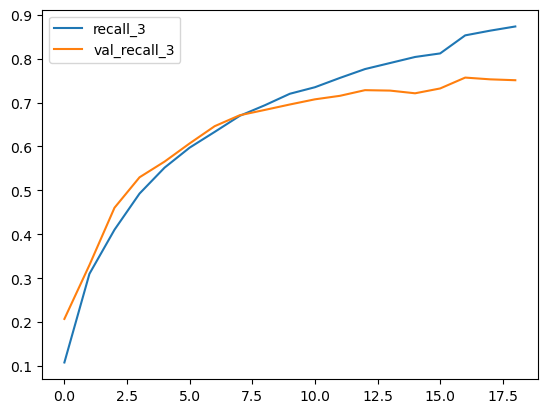

In [40]:
history_df.loc[:, ['recall_3', 'val_recall_3']].plot()

<Axes: >

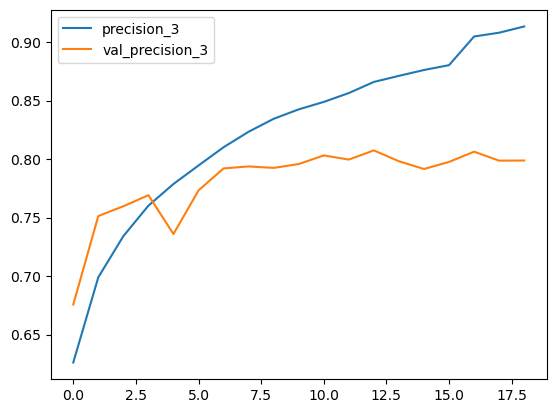

In [41]:
history_df.loc[:, ['precision_3', 'val_precision_3']].plot()

<Axes: >

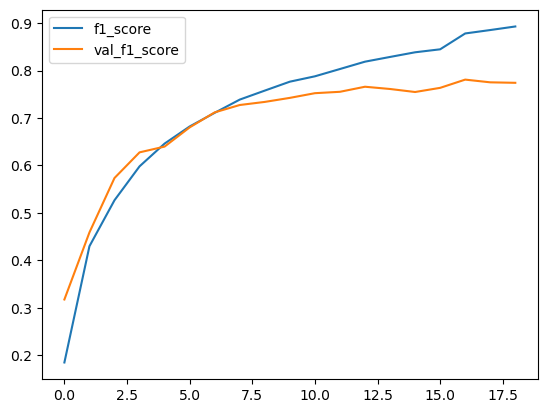

In [42]:
history_df.loc[:, ['f1_score', 'val_f1_score']].plot()

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       208
           1       0.93      0.88      0.90       189
           2       0.77      0.57      0.66       199
           3       0.60      0.57      0.59       208
           4       0.79      0.70      0.74       196
           5       0.60      0.77      0.67       202
           6       0.79      0.87      0.83       214
           7       0.87      0.85      0.86       199
           8       0.85      0.89      0.87       194
           9       0.81      0.87      0.84       191

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



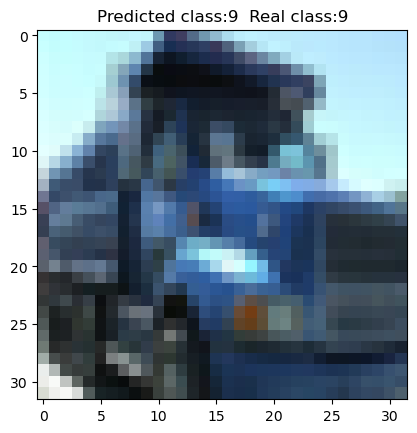

In [43]:
preds = model_2.predict(X_test)
preds = np.argmax(preds, axis=1)
y_test_idx = np.argmax(y_test, axis=1)
print(classification_report(y_test_idx, preds))
i = 0
plt.imshow(X_test[i])
plt.title('Predicted class:'+str(preds[i])+'  Real class:'+str(y_test_idx[i]))
model_2.save('Models/Exp_2_callbacks.keras')

In [44]:
# Exp 3
# Используем предобученный бэкбон resnet50

In [45]:
base_resnet = keras.applications.resnet50.ResNet50(weights = 'imagenet', include_top=False, input_shape=(32,32,3), pooling = 'avg')

In [46]:
inputs = keras.Input(shape = (32,32,3))
x = base_resnet(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation="relu", name='Dense_1')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(512, activation='relu', name='Dense_2')(x)
x = keras.layers.Dense(256, activation='relu', name='Dense_3')(x)
output = keras.layers.Dense(10, activation='softmax', name='Output')(x)



model_3 = keras.models.Model(inputs = inputs, outputs = output)
model_3.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,041,546 (95.53 MB)

 Trainable params: 24,984,330 (95.31 MB)

 Non-trainable params: 57,216 (223.50 KB)

In [47]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                loss="categorical_crossentropy",
                metrics=[F1Score(), 
                         tf.keras.metrics.Precision(), 
                         tf.keras.metrics.Recall()])

In [48]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="Exp3_logs")

In [49]:
history_3 = model_3.fit(dataset_train, validation_data=dataset_valid, 
                    epochs=10, callbacks=[learn_rate_red, early_stop, tensorboard])

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - f1_score: 0.4557 - loss: 1.4161 - precision_5: 0.7038 - recall_5: 0.3520 - val_f1_score: 0.0691 - val_loss: 3.4255 - val_precision_5: 0.1106 - val_recall_5: 0.0503 - learning_rate: 5.0000e-04
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 415s 2s/step - f1_score: 0.7821 - loss: 0.6375 - precision_5: 0.8483 - recall_5: 0.7256 - val_f1_score: 0.0989 - val_loss: 3.8809 - val_precision_5: 0.0990 - val_recall_5: 0.0989 - learning_rate: 5.0000e-04
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - f1_score: 0.8523 - loss: 0.4411 - precision_5: 0.8909 - recall_5: 0.8170 - val_f1_score: 0.1574 - val_loss: 3.1785 - val_precision_5: 0.2112 - val_recall_5: 0.1254 - learning_rate: 5.0000e-04
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - f1_score: 0.8883 - loss: 0.3401 - precision_5: 0.9132 - recall_5: 0.8648 - val_f1_score: 0.3690 - val_loss: 2.4565 - val_precision_5: 0.4117 - val_recall_5: 0.3344 - learning_rate: 5.0000e-04
Epoch 5/10
1

In [50]:
eval_hist_3 = model_3.evaluate(dataset_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - f1_score: 0.7421 - loss: 0.9319 - precision_5: 0.7698 - recall_5: 0.7164


In [51]:
print("Eval_loss = {} \nEval_f1 = {} \nEval_precision = {} \nEval_recall = {}".format(eval_hist_3[0], 
                                                                                      eval_hist_3[1], 
                                                                                      eval_hist_3[2],
                                                                                      eval_hist_3[3]))

Eval_loss = 0.955940842628479 
Eval_f1 = 0.7454639077186584 
Eval_precision = 0.773950457572937 
Eval_recall = 0.718999981880188


<Axes: >

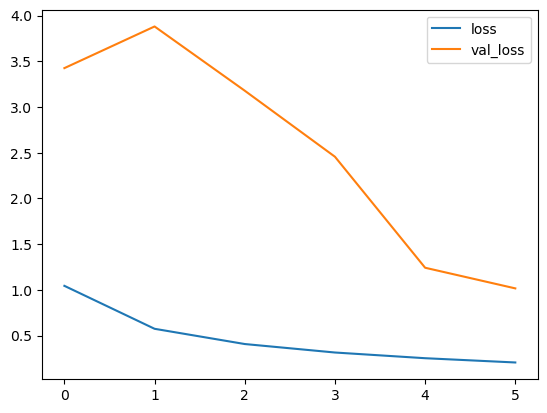

In [52]:
#График изменения функции потерь
history_df = pd.DataFrame(history_3.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [53]:
print(history_df.columns)

Index(['f1_score', 'loss', 'precision_5', 'recall_5', 'val_f1_score',
       'val_loss', 'val_precision_5', 'val_recall_5', 'learning_rate'],
      dtype='object')


<Axes: >

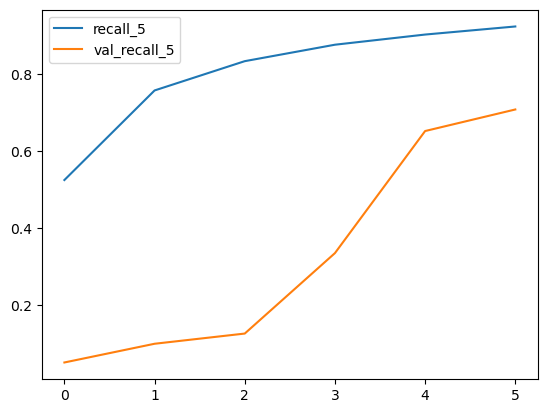

In [54]:
history_df.loc[:, ['recall_5', 'val_recall_5']].plot()

<Axes: >

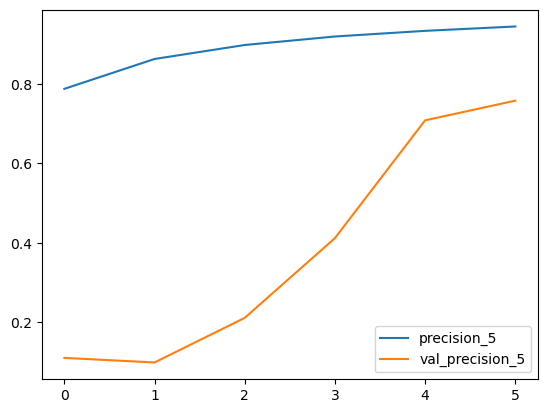

In [55]:
history_df.loc[:, ['precision_5', 'val_precision_5']].plot()

<Axes: >

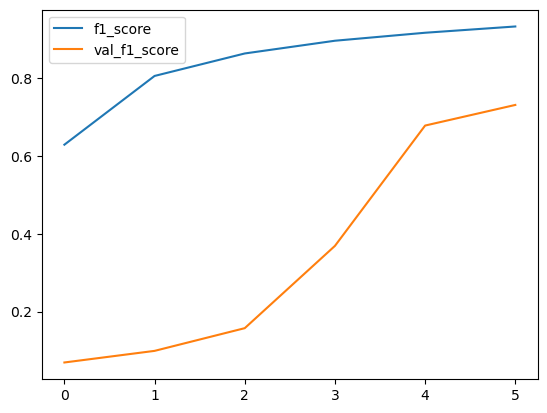

In [56]:
history_df.loc[:, ['f1_score', 'val_f1_score']].plot()

In [57]:
preds = model_3.predict(X_test)
preds = np.argmax(preds, axis=1)
y_test_idx = np.argmax(y_test, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step


In [58]:
print(classification_report(y_test_idx, preds))

              precision    recall  f1-score   support

           0       0.65      0.90      0.76       208
           1       0.91      0.76      0.83       189
           2       0.72      0.69      0.71       199
           3       0.50      0.66      0.57       208
           4       0.83      0.54      0.65       196
           5       0.72      0.62      0.67       202
           6       0.93      0.72      0.81       214
           7       0.88      0.76      0.81       199
           8       0.71      0.94      0.81       194
           9       0.81      0.83      0.82       191

    accuracy                           0.74      2000
   macro avg       0.77      0.74      0.74      2000
weighted avg       0.76      0.74      0.74      2000



Text(0.5, 1.0, 'Predicted class:9  Real class:9')

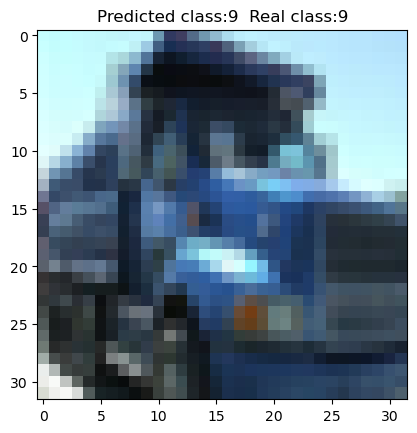

In [59]:
i = 0
plt.imshow(X_test[i])
plt.title('Predicted class:'+str(preds[i])+'  Real class:'+str(y_test_idx[i]))

In [60]:
model_3.save('Models/Exp3_pretrained.keras')

In [61]:
# Тест итоговой модели
# md В качестве итоговой возьмем лучшую модель (модель из 3 эксперимента).

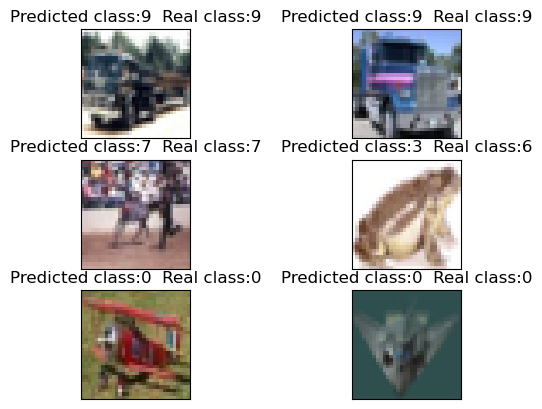

In [62]:

h, w = (2, 3)
fig, axs = plt.subplots(w, h)
for i in range(w):
    for j in range(h):
        num = np.random.randint(2000)
        axs[i, j].imshow(X_test[num])
        axs[i, j].set_title('Predicted class:'+str(preds[num])+'  Real class:'+str(y_test_idx[num]))
        axs[i, j].set(xticks=[], yticks=[])